In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crops = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/crops_map.tif'))
band_01 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_01.tif'))
band_02 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_02.tif'))
band_03 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_03.tif'))
band_04 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_04.tif'))
band_05 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_05.tif'))
band_06 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_06.tif'))
band_07 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_07.tif'))
band_08 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_08.tif'))
band_8A = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_8A.tif'))
band_09 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_09.tif'))
band_10 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_10.tif'))
band_11 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_11.tif'))
band_12 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_12.tif'))

In [3]:
from sklearn.preprocessing import normalize

In [4]:
band_01 = normalize(band_01)
band_02 = normalize(band_02)
band_03 = normalize(band_03)
band_04 = normalize(band_04)
band_05 = normalize(band_05)
band_06 = normalize(band_06)
band_07 = normalize(band_07)
band_08 = normalize(band_08)
band_8A = normalize(band_8A)
band_09 = normalize(band_09)
band_10 = normalize(band_10)
band_11 = normalize(band_11)
band_12 = normalize(band_12)

In [5]:
ndvi = (band_08 - band_04) / (band_08 + band_04)
evi = 2.5*(band_08 - band_04) / (band_08 + 6*band_04 - 7.5*band_02 + 1)
lswi = (band_08 - band_11) / (band_08 + band_11)

In [6]:
def extend(input_image, radius, boundary='zero'):
    if input_image.ndim == 2:
        extended_image = np.zeros((input_image.shape[0]+2*radius, input_image.shape[1]+2*radius),
                                  dtype=input_image.dtype)
    else:
        extended_image = np.zeros((input_image.shape[0]+2*radius, input_image.shape[1]+2*radius, input_image.shape[2]),
                                 dtype=input_image.dtype)
    extended_image[radius:-radius,radius:-radius] = input_image
    
    if boundary == 'periodic':
        extended_image[:radius,:radius] = input_image[-radius:,-radius:]
        extended_image[-radius:,-radius:] = input_image[:radius,:radius]
        extended_image[:radius,-radius:] = input_image[-radius:,:radius]
        extended_image[-radius:,:radius] = input_image[:radius,-radius:]

        extended_image[:radius,radius:-radius] = input_image[-radius:,:]
        extended_image[-radius:,radius:-radius] = input_image[:radius,:]
        extended_image[radius:-radius, :radius] = input_image[:,-radius:]
        extended_image[radius:-radius, -radius:] = input_image[:,:radius]
    elif boundary == 'mirror':
        extended_image[:radius,:radius] = np.flipud(np.fliplr(input_image[:radius,:radius]))
        extended_image[-radius:,-radius:] = np.flipud(np.fliplr(input_image[-radius:,-radius:]))
        extended_image[:radius,-radius:] = np.flipud(np.fliplr(input_image[:radius,-radius:]))
        extended_image[-radius:,:radius] = np.flipud(np.fliplr(input_image[-radius:,:radius]))

        extended_image[:radius,radius:-radius] = np.flipud(input_image[:radius,:])
        extended_image[-radius:,radius:-radius] = np.flipud(input_image[-radius:,:])
        extended_image[radius:-radius, :radius] = np.fliplr(input_image[:,:radius])
        extended_image[radius:-radius, -radius:] = np.fliplr(input_image[:,-radius:])
    
    return extended_image

In [7]:
crops = extend(crops, 100)
band_01 = extend(band_01, 100, boundary='mirror')
band_02 = extend(band_02, 100, boundary='mirror')
band_03 = extend(band_03, 100, boundary='mirror')
band_04 = extend(band_04, 100, boundary='mirror')
band_05 = extend(band_05, 100, boundary='mirror')
band_06 = extend(band_06, 100, boundary='mirror')
band_07 = extend(band_07, 100, boundary='mirror')
band_08 = extend(band_08, 100, boundary='mirror')
band_8A = extend(band_8A, 100, boundary='mirror')
band_09 = extend(band_09, 100, boundary='mirror')
band_10 = extend(band_10, 100, boundary='mirror')
band_11 = extend(band_11, 100, boundary='mirror')
band_12 = extend(band_12, 100, boundary='mirror')
ndvi = extend(ndvi, 100, boundary='mirror')
evi = extend(evi, 100, boundary='mirror')
lswi = extend(lswi, 100, boundary='mirror')

In [22]:
corn = np.where(crops==1)
wheat = np.where(crops==23)
soybeans = np.where(crops==5)
drybeans = np.where(crops==42)
sugarbeets = np.where(crops==41)

In [23]:
print(corn[0].shape)
print(wheat[0].shape)
print(soybeans[0].shape)
print(drybeans[0].shape)
print(sugarbeets[0].shape)

(1653315,)
(2599875,)
(3152724,)
(594144,)
(1201371,)


In [24]:
sample_size = 1000
r = np.random.choice(range(len(corn[0])), size=sample_size, replace=False)
corn = (corn[0][r], corn[1][r])
r = np.random.choice(range(len(wheat[0])), size=sample_size, replace=False)
wheat = (wheat[0][r], wheat[1][r])
r = np.random.choice(range(len(soybeans[0])), size=sample_size, replace=False)
soybeans = (soybeans[0][r], soybeans[1][r])
r = np.random.choice(range(len(drybeans[0])), size=sample_size, replace=False)
drybeans = (drybeans[0][r], drybeans[1][r])
r = np.random.choice(range(len(sugarbeets[0])), size=sample_size, replace=False)
sugarbeets = (sugarbeets[0][r], sugarbeets[1][r])

In [25]:
s = 22 # neighborhood radius of the classified pixel

# feature to use
feature_1 = ndvi
feature_2 = evi
feature_3 = lswi

images_corn = [np.dstack([feature_1[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                feature_2[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                feature_3[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((corn[0], corn[1]))]

images_wheat = [np.dstack([feature_1[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                feature_2[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                feature_3[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((wheat[0], wheat[1]))]

images_soybeans = [np.dstack([feature_1[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                feature_2[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
        feature_3[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((soybeans[0], soybeans[1]))]

images_drybeans = [np.dstack([feature_1[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                feature_2[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
        feature_3[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((drybeans[0], drybeans[1]))]

images_sugarbeets = [np.dstack([feature_1[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                feature_2[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
        feature_3[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((sugarbeets[0], sugarbeets[1]))]

In [26]:
X = np.vstack((images_corn, images_wheat, images_soybeans, images_drybeans, images_sugarbeets))
y = np.hstack(([0]*len(images_corn), [1]*len(images_wheat), [2]*len(images_soybeans), [3]*len(images_drybeans), [4]*len(images_sugarbeets)))

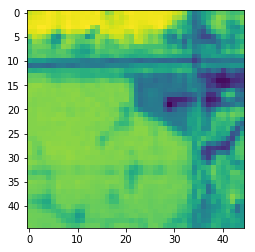

In [27]:
plt.imshow(X[0][...,0])

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
#Building the model
gmodel = Sequential()
#Conv Layer 1
gmodel.add(Conv2D(50, kernel_size=(2,2), activation='relu', input_shape=(45,45,3)))
gmodel.add(MaxPooling2D(pool_size=(8,8), strides=(2,2)))
gmodel.add(Dropout(0.5))

#Conv Layer 2
gmodel.add(Conv2D(50, kernel_size=(2,2), activation='relu'))
gmodel.add(MaxPooling2D(pool_size=(8,8), strides=(2,2)))
gmodel.add(Dropout(0.5))

#Flatten the data for upcoming dense layers
gmodel.add(Flatten())

#Dense Layers
gmodel.add(Dense(1000))
gmodel.add(Activation('relu'))
gmodel.add(Dropout(0.5))

#Sigmoid Layer
gmodel.add(Dense(5))
gmodel.add(Activation('softmax'))

mypotim = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
gmodel.compile(loss='sparse_categorical_crossentropy', optimizer=mypotim, metrics=['sparse_categorical_accuracy'])
gmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 44, 44, 50)        650       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 50)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 19, 19, 50)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        10050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1800)              0         
__________

In [16]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1, test_size=0.25)

In [31]:
es = EarlyStopping('val_loss', patience=10, mode="min")
msave = ModelCheckpoint('.model_weights.hdf5', monitor='loss', save_best_only=True)
callbacks = [es, msave]

In [32]:
history = gmodel.fit(X_train, y_train, batch_size=24, epochs=100, verbose=1,
                     validation_data=(X_valid, y_valid), callbacks=callbacks)

Train on 3750 samples, validate on 1250 samples
Epoch 1/100
3750/3750 [==============================] - 17s 4ms/step - loss: 0.9353 - sparse_categorical_accuracy: 0.6141 - val_loss: 1.2298 - val_sparse_categorical_accuracy: 0.5528
Epoch 2/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.5755 - sparse_categorical_accuracy: 0.7952 - val_loss: 1.3095 - val_sparse_categorical_accuracy: 0.4416
Epoch 3/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4836 - sparse_categorical_accuracy: 0.8325 - val_loss: 1.2401 - val_sparse_categorical_accuracy: 0.4104
Epoch 4/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4282 - sparse_categorical_accuracy: 0.8581 - val_loss: 1.0222 - val_sparse_categorical_accuracy: 0.7416
Epoch 5/100
3750/3750 [==============================] - 17s 4ms/step - loss: 0.4005 - sparse_categorical_accuracy: 0.8619 - val_loss: 1.1825 - val_sparse_categorical_accuracy: 0.5792
Epoch 6/100
3750/3750 [=========

3750/3750 [==============================] - 17s 5ms/step - loss: 0.2207 - sparse_categorical_accuracy: 0.9248 - val_loss: 0.3724 - val_sparse_categorical_accuracy: 0.8816
Epoch 45/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2167 - sparse_categorical_accuracy: 0.9245 - val_loss: 0.4402 - val_sparse_categorical_accuracy: 0.8504
Epoch 46/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2004 - sparse_categorical_accuracy: 0.9277 - val_loss: 0.4683 - val_sparse_categorical_accuracy: 0.8288
Epoch 47/100
3750/3750 [==============================] - 17s 4ms/step - loss: 0.2083 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.3545 - val_sparse_categorical_accuracy: 0.8800
Epoch 48/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2048 - sparse_categorical_accuracy: 0.9293 - val_loss: 0.4880 - val_sparse_categorical_accuracy: 0.8224
Epoch 49/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2134 - 

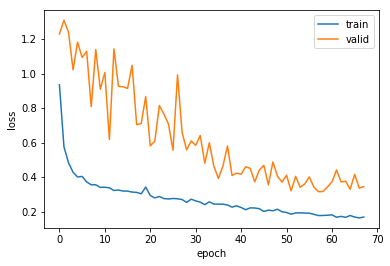

In [50]:
plt.plot(history.epoch, history.history['loss'], label='train')
plt.plot(history.epoch, history.history['val_loss'], label='valid')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

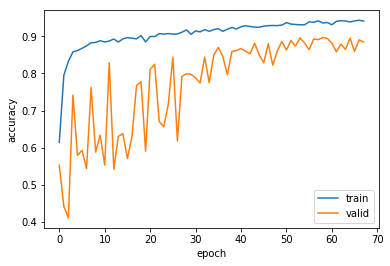

In [51]:
plt.plot(history.epoch, history.history['sparse_categorical_accuracy'], label='train')
plt.plot(history.epoch, history.history['val_sparse_categorical_accuracy'], label='valid')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()